# MULTIPLE LINEAR REGRESSION. 

A supervised machine learning technique that uses multiple variables to predict an outcome. Just a like linear regression, this statistical model attempts to model a relationship between variables along a straight line. A linear relatioship follows a straight line. A multiple linear regressor attempts to study the relationship between multiple independent variables and one dependent variable. This tutorial attempts to map the relationship between voter election turnout 2020(target) and various predictors such as population, median age and historical voter turn out in the United States. This region of interest was chosen because of ease of availabilty of data and the potential political impact, informed parties can make informed decisions that prove to be the edge over rivals. 

## How To Use A Linear Model.
Formula : 

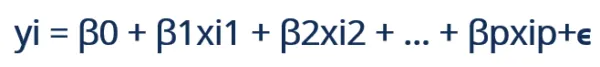

Where : 

* **yi** - Dependent variable 
* **β0** - y intercept 
* **β1 & β2** - regression coefficients, representing a change in y when xi1 and xi2 are changed by one unit
* **xip** - independent variables 
* **βp** - slope coefficient 

<center><img src="../images/Linear_reg2.jpg" width=800px height=500px /></center>


A linear regression model takes the form of an equation line that passes through a set of data points represented in a scatter plot. This is aline that bests represent the overal direction of points, assumptions must be made, since a single line cannot pass through all of them. In order to plot such a line we need to have two things ;

* A point at which the lines starts in the Y axis - This a value when X(predictor) is 0, commonly refered to ass constant or intercept.   
* The gradient / slope coefficient - 

Python attempst to estimate these values by minimising the distance between the line an all points using least squares estimation. This ensures that the redisual(distance between a vertical ditance between a data point and the regression line) is minimal. The model provides coefficient values for each variable thus elucidate the impact of each of them providing a deeper understandanding that will serve as a foundation for other complex models. A linear regression model is easy to implement and doesn not act like a black box like neural networks. 
MSE cost function is deployed, it calculates the average squared error difference between predicted and observed values. 



## Data Source.
Data was collected from MIT Election data hub (https://dataverse.harvard.edu/). Data contains various meterics aggregated at county level. There were more than 20 variables but only 4 were selected for this study. In the upcoming tutorials, many more will be incoorperated into other complex machine learning algorithsm such as random forest, knn and gradient boost. 

<center><img src="../images/Linear_reg3.jpg" width=800px height=500px /></center>





## Assumptions in a linear model. 

1. The relationship between two variables must be linear. Else data should be transfomed or non-linear regression used. 
2. Independent variables should not be highly correlated, or show multi-collinearity. This ensures that its easy to figure out the variance a specific independent variable has over the dependent one. 
3. The variance of error in residuals is constant at each point of the model. Residual is actual value of y minus predicted value. We should plot the standardized residuals against the predicted values to determine if the points are distributed fairly across all the values of independent variables
4. All observations should be independent of one another. This means that the residuals should be independent.
5. Residuals have a multivariate normality where they are normally distributed. 



# 1. Data Preparation. 

In [113]:
# Import Modules.

import pandas as pd 
import geopandas as gpd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mapclassify                        # For map classification scheme 


from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet


In [50]:
# Load data path
path = 'F:/Programs/Secrets of ML/Data/US_Elections.gpkg'

# Read data containing county polygons. 
data = gpd.read_file(path, layer='US_CountyElections_clean')

# Geodata properties 
print(f'Coordinate reference system : {data.crs} \n--------------\n\n\
      dataframe type : {type(data)}')

Coordinate reference system : EPSG:3857 
--------------

      dataframe type : <class 'geopandas.geodataframe.GeoDataFrame'>


In [61]:
# Subset data 
data = data[['population', '2022_median_age', 'voter_turnout_2016', 'voter_turnout_2020', 'geometry' ]]

# View 
print(f'Column names : {data.columns} \n----------\n\
      Observations : {data.info(verbose=True)} \n----------\n\
      Data distribution : \n {data.describe().round(2)}\n')



<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   population          3108 non-null   int64   
 1   2022_median_age     3108 non-null   float64 
 2   voter_turnout_2016  3108 non-null   float64 
 3   voter_turnout_2020  3108 non-null   float64 
 4   geometry            3108 non-null   geometry
dtypes: float64(3), geometry(1), int64(1)
memory usage: 121.5 KB
Column names : Index(['population', '2022_median_age', 'voter_turnout_2016',
       'voter_turnout_2020', 'geometry'],
      dtype='object') 
----------
      Observations : None 
----------
      Data distribution : 
         population  2022_median_age  voter_turnout_2016  voter_turnout_2020
count      3108.00          3108.00             3108.00             3108.00
mean     105939.71            42.60                0.59                0.66
std      337099.73      

# 2. Visualise choropleth map. 

Sometimes choropleths exist as part of larger figures that may include more choropleths. In some cases, each of them can be best considered as an independent map. Lets create a single map figure containing pooled classifications of all variables to be studied in single map but all consistent.  

In [62]:
# Scale median age and population data to have a common scale. 

# Select unscaled data 
data2 = data[['population', '2022_median_age']]
# Scale ALL numeric data through normalisation 
scaleMinMax = MinMaxScaler(feature_range=(0, 1))  # Scaler ensures values should range between 0 and 1 

data2 = scaleMinMax.fit_transform(data2)

# Create a dataframe of scaled data 
data2 = pd.DataFrame(data2, columns=['population', '2022_median_age'])
data2

,population,2022_median_age
0,0.005866,0.397163
1,0.023138,0.496454
2,0.002512,0.427896
3,0.002220,0.413712
4,0.005899,0.449173
...,...,...
3103,0.004215,0.312057
3104,0.002323,0.397163
3105,0.002036,0.321513
3106,0.000761,0.494090


Sample data : 
    population  2022_median_age  voter_turnout_2016  voter_turnout_2020  \
0    0.005866         0.397163            0.604600            0.632502   
1    0.023138         0.496454            0.598103            0.627867   

                                            geometry  
0  MULTIPOLYGON (((-9619464.071 3856528.446, -961...  
1  MULTIPOLYGON (((-9742872.755 3543445.886, -974...   
 ------------
 


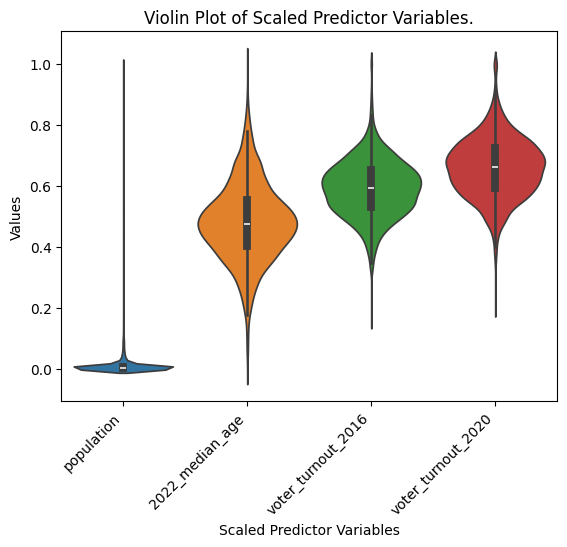

In [78]:
# Merge data and plot a vioilin showing distribution 

# Drop column to be scaled from original dataframe 
scaled_data = data.drop(['population', '2022_median_age'], axis=1)

# Merge remaining columns with scaled data 
scaled_data = pd.concat([data2, scaled_data], axis=1)

# Create geodataframe
scaled_data = gpd.GeoDataFrame(scaled_data, crs="EPSG:3857", geometry=scaled_data.geometry)

# Sample data
print(f'Sample data : \n {scaled_data.head(2)} \n ------------\n ')

# Plot scaled data 
sns.violinplot(data=scaled_data)
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Violin Plot of Scaled Predictor Variables.')
plt.xlabel('Scaled Predictor Variables')
plt.ylabel('Values')

plt.show()

In [55]:
# List the columns we need to visualise 
map_variables = ['population', '2022_median_age', 'voter_turnout_2016', 'voter_turnout_2020']

# Create pooled classification
pooled = mapclassify.Pooled(scaled_data[map_variables], classifier="Quantiles", k=5)

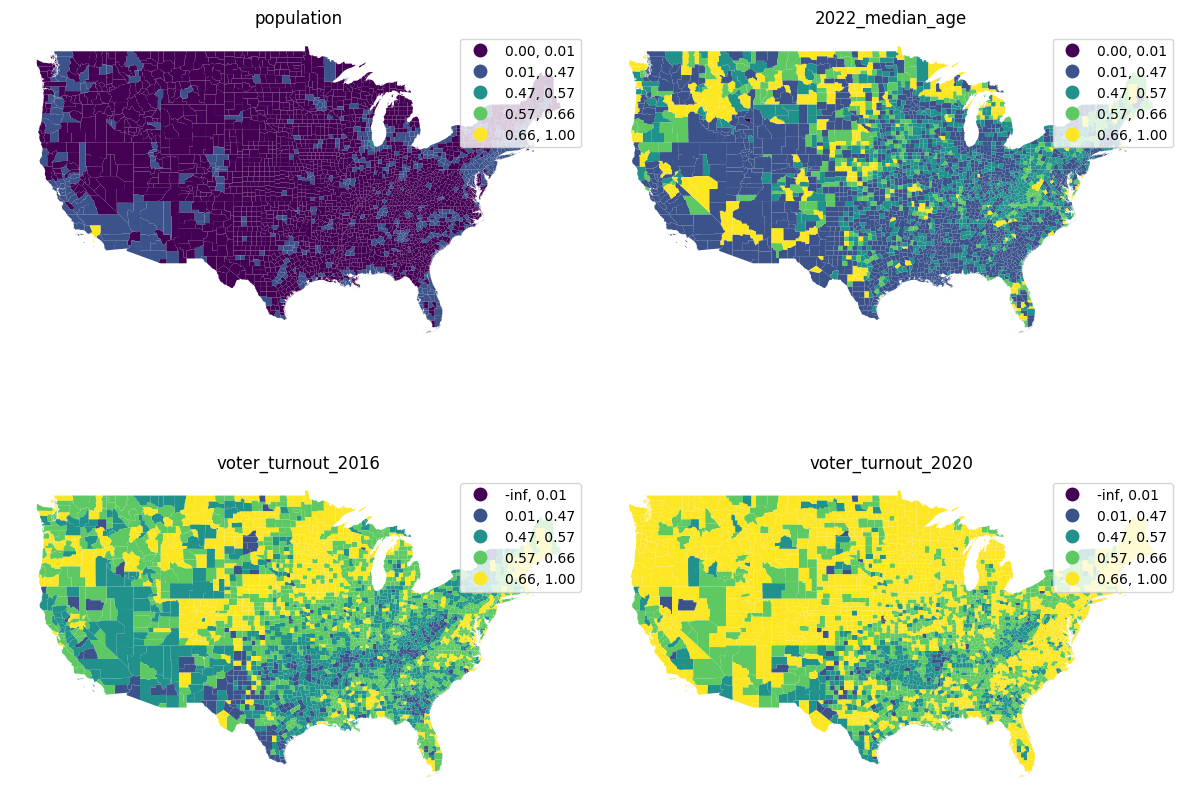

In [64]:
# Set up figure with four axis
f, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the array of axis so you can loop over in one dimension
axs = axs.flatten()

# Loop over each variable 
for i, y in enumerate(map_variables):
    
    # Plot data 
    scaled_data.plot(   y,                      # Column to plot
                        ax=axs[i],              # Plot on the corresponding axis
                        scheme="UserDefined",   # Use our own bins
                        classification_kwds={ 
                            "bins": pooled.global_classifier.bins },       # Use global bins
                        legend=True             # Add a legend
    )

    # Remove axis
    axs[i].set_axis_off()

    # Name the subplot with the name of the column
    axs[i].set_title(y)


# Tight layout to better use space
plt.tight_layout()
# Display figure
plt.show()

## 3. Prediction Model One.

Predict 2020 voter turn out using the three training features. 

### 3.1 Correlation.

C:\Users\Admin\AppData\Local\Temp\ipykernel_8480\1356254690.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')


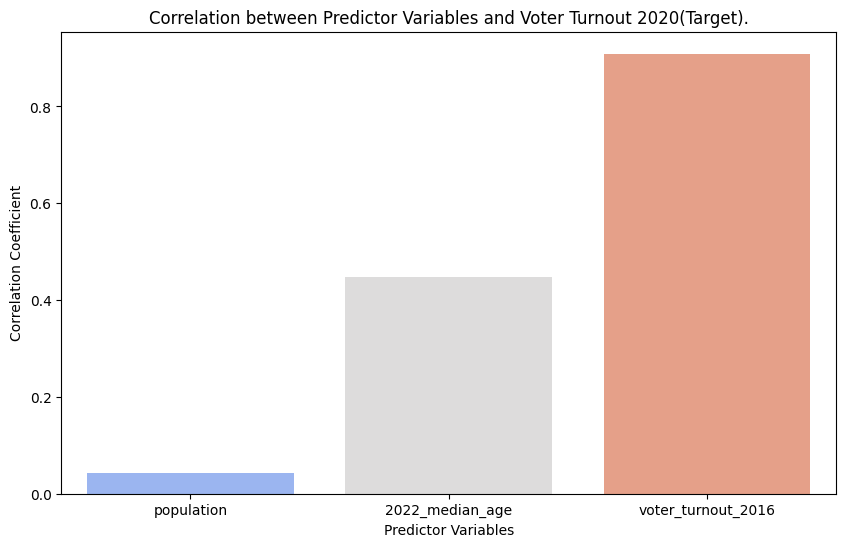

In [81]:
# Plot a correlation matrix between predictor variables and target
scaled_data = scaled_data.select_dtypes(include=['int64', 'float'])
correlations = scaled_data.corr()['voter_turnout_2020'].drop('voter_turnout_2020')

# Use Seaborn to create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')

# Title and labels
plt.title('Correlation between Predictor Variables and Voter Turnout 2020(Target).')
plt.xlabel('Predictor Variables')
plt.ylabel('Correlation Coefficient')

# Show plot
plt.show()

In [90]:
# Split data into dependent and independent variables 

X = scaled_data.drop(['voter_turnout_2020'], axis=1)

y = scaled_data['voter_turnout_2020']



In [104]:
# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=23)
 
# Create a linear regression model by importing the class 
lin_reg1 = LinearRegression()

# Train the model on train and test data
lin_reg1.fit(X_train, y_train)
lin_reg1.fit(X_test, y_test)

# Make predictions on training and test data 
y_pred_train = lin_reg1.predict(X_train)
y_pred_test = lin_reg1.predict(X_test)

# 4. Model Evaluation. 

In [105]:
# intercepts and coefficients are used in prediction 
# the y-intercept is the value of target variable when all independent variables are set to 0.
# Coefficients can provide the basis for a crude feature importance score. This assumes that the 
# input variables have the same scale or have been scaled prior to fitting a model.

c = lin_reg1.intercept_
m = lin_reg1.coef_

print(f'y-intercept = {c} \n regression coefficient of each variable : {m}')

y-intercept = 0.0705832722022669 
 regression coefficient of each variable : [0.13477024 0.03669981 0.96008576]


In [106]:
# Plot variable importance

# Print the feature importances
for feature, coef in zip(X.columns, m):
    print(f'Feature <:> {feature} -> Coefficient: {coef}')

Feature <:> population -> Coefficient: 0.13477023679779393
Feature <:> 2022_median_age -> Coefficient: 0.0366998090223776
Feature <:> voter_turnout_2016 -> Coefficient: 0.9600857593906428


In [107]:
# Evaluate the model metrics , know how well the model performed 

# Model can be evaluated using mean sqaure error or mean absolute error by comparing with the mean of the 
# target variable.
#  mean_squared_error is the mean of the sum of residuals. mean_absolute_error is the mean of the absolute errors 
# of the model. The less the error, the better the model performance is.
mse1 = mean_squared_error(y_train, y_pred_train)
mse2 = mean_squared_error(y_test, y_pred_test)

# using R2 score which tell how close the data fitted into the regression line. 
# It tells the proportion of variance in the dependent variable that can be explained by the independent variable
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('mean_squared_error on train data : ', mse1) 
print('mean_squared_error on test data : ', mse2) 
print('R^2 Score on training data : ', r2_train) 
print('R^2 Score on test data : ', r2_test) 


mean_squared_error on train data :  0.0017296798104852683
mean_squared_error on test data :  0.0012662660900786336
R^2 Score on training data :  0.814992691482598
R^2 Score on test data :  0.8674411144734213


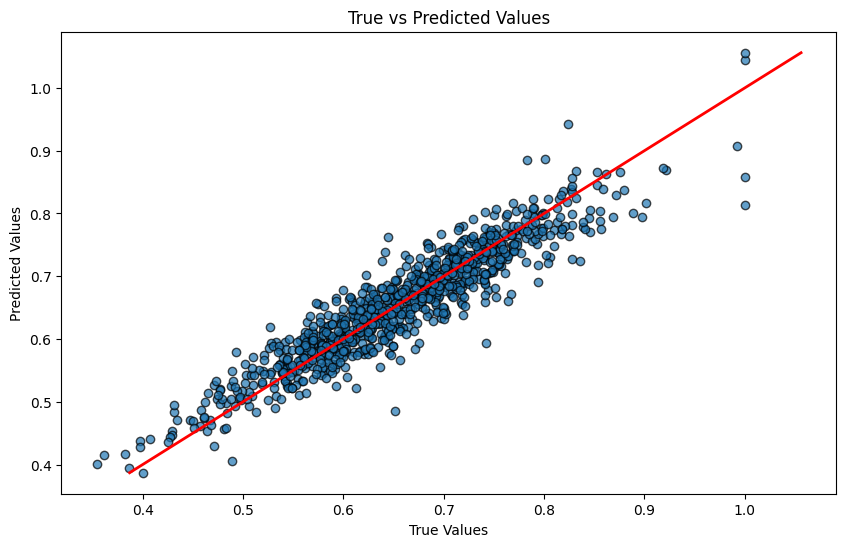

In [110]:
# Evaluate how well the model predicted its own data 
# Visualise results using scatter plot and a gradient/best line 

# Initiate plot 
plt.figure(figsize=(10, 6))
# Scatter plot
plt.scatter(y_test, y_pred_test, edgecolor='k', alpha=0.7)
# Gradient line
plt.plot([min(y_pred_test), max(y_pred_test)], [min(y_pred_test), max(y_pred_test)], color='r', lw=2)

# Labels
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

In [38]:
# From visually analysising the graph, the modell performed quite good but we can better understand performance 


0.4838351638729127

# 5. Hyperparameter Tuning.


Tuning a linear regression model generally involves selecting and engineering features, normalizing data, and possibly using techniques like regularization to prevent overfitting. Below are some common steps and techniques for tuning a linear regression model:

1. Feature Selection
Choose relevant features that contribute significantly to the target variable. Techniques like correlation analysis, p-values, and feature importance can help in selecting the right features.

2. Feature Engineering
Create new features that might capture additional information. For example, combining existing features or creating polynomial features can sometimes improve model performance.

3. Normalization/Standardization
Scale your features to ensure they have similar ranges. This can improve the performance of the model and speed up the convergence of gradient descent.

4. Regularization
Regularization techniques like Ridge (L2) and Lasso (L1) can help to prevent overfitting by adding a penalty to large coefficients. ElasticNet combines both L1 and L2 regularization.

5. Cross-Validation
Use cross-validation to ensure that your model generalizes well to unseen data. Techniques like k-fold cross-validation can provide a more robust estimate of model performance.

6. Hyperparameter Tuning
Use techniques like Grid Search or Random Search to find the optimal hyperparameters for regularization techniques.

In [119]:
# Hyperparameter Tunning. 

# Create a pipeline for feature scaling and model fitting
pipeline = Pipeline([
    # ('scaler', StandardScaler()),          # Normalize features
    ('poly', PolynomialFeatures(degree=2)),  # Polynomial features
    ('model', Ridge())                       # Use Ridge regression as an example
])

# N/B - We can replace Ridge with Lasso or ElasticNet in the pipeline and adjust the param_grid 
# accordingly to try different regularization techniques.

# Hyperparameter tuning with Grid Search
param_grid = {
    'poly__degree': [1, 2, 3],
    'model__alpha': [0.1, 1, 10, 100]  # Regularization strength for Ridge
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_

y_pred_test2 = best_model.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_test2)
r2_tuned = r2_score(y_test, y_pred_test2)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error after parameter tunning : {mse_tuned}')
print(f'R^2 Score after tuinning : {r2_tuned}')

Best Parameters: {'model__alpha': 0.1, 'poly__degree': 3}
Mean Squared Error after parameter tunning : 0.0012623585277491477
R^2 Score after tuinning : 0.8678501770800731


Test the model on test dataset.

# References 

1. Feature importance - https://machinelearningmastery.com/calculate-feature-importance-with-python/